# This Is a Small Example Using Fracnetics

## Install and Load Packages

In [1]:
!pip install --upgrade fracnetics
import fracnetics as fn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import copy
from sklearn.metrics import accuracy_score


[notice] A new release of pip available: 22.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


## Loading Data (Iris)

In [2]:
data = load_iris(as_frame=True)

In [3]:
X, y = data['data'], data['target']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=45,shuffle=True,stratify=y)
X_train=copy.deepcopy(X_train)
y_train=copy.deepcopy(y_train)

In [4]:
X_train.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,135.000000,135.000000,135.000000,135.000000
mean,5.865926,3.064444,3.774074,1.195556
std,0.837922,0.435456,1.790396,0.758422
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.550000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.350000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Initializing the Population

In [5]:
# initializing population

pop = fn.Population(
    seed=42,
    ni=300,
    jn=1,
    jnf=4,
    pn=2,
    pnf=3,
    fractalJudgment=False
)

In [7]:
minFeatures = X_train.min(axis=0).values
maxFeatures = X_train.max(axis=0).values

In [8]:
maxFeatures

array([7.9, 4.4, 6.9, 2.5])

In [9]:
minFeatures

array([4.3, 2. , 1. , 0.1])

In [10]:
pop.setAllNodeBoundaries(minFeatures,maxFeatures)

## Training the Population

In [11]:
fitnessProgessBest = []
fitnessProgessMean = []
fitnessProgessMin = []

for g in range(250):
  pop.callTraversePath(X_train.values,dMax=10)
  for ind in pop.individuals:
    ind.fitness = accuracy_score(y_train,ind.decisions)
  pop.tournamentSelection(2,1)
  pop.callAddDelNodes(minFeatures,maxFeatures)
  pop.callEdgeMutation(0.05, 0.05)
  pop.crossover(0.05)
  fitnessProgessBest.append(pop.bestFit)
  fitnessProgessMean.append(pop.meanFitness)
  fitnessProgessMin.append(pop.minFitness)
  print(f"Generation: {g} | Best Fitness: {pop.bestFit}")

Generation: 0 | Best Fitness: 0.6666666865348816
Generation: 1 | Best Fitness: 0.6666666865348816
Generation: 2 | Best Fitness: 0.6666666865348816
Generation: 3 | Best Fitness: 0.6666666865348816
Generation: 4 | Best Fitness: 0.6666666865348816
Generation: 5 | Best Fitness: 0.6666666865348816
Generation: 6 | Best Fitness: 0.6666666865348816
Generation: 7 | Best Fitness: 0.6666666865348816
Generation: 8 | Best Fitness: 0.6666666865348816
Generation: 9 | Best Fitness: 0.6666666865348816
Generation: 10 | Best Fitness: 0.6666666865348816
Generation: 11 | Best Fitness: 0.6666666865348816
Generation: 12 | Best Fitness: 0.6666666865348816
Generation: 13 | Best Fitness: 0.6666666865348816
Generation: 14 | Best Fitness: 0.6666666865348816
Generation: 15 | Best Fitness: 0.6666666865348816
Generation: 16 | Best Fitness: 0.6666666865348816
Generation: 17 | Best Fitness: 0.6666666865348816
Generation: 18 | Best Fitness: 0.6666666865348816
Generation: 19 | Best Fitness: 0.6666666865348816
Generation

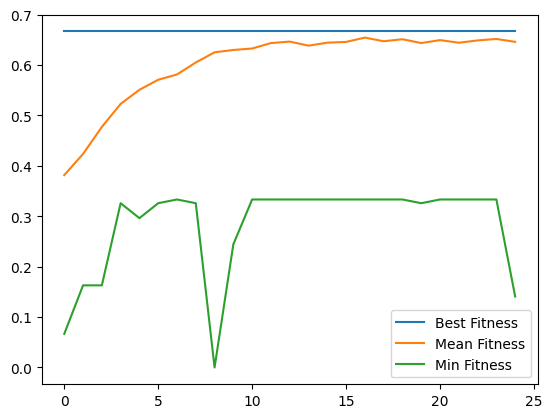

In [12]:
plt.plot(fitnessProgessBest, label="Best Fitness")
plt.plot(fitnessProgessMean, label="Mean Fitness")
plt.plot(fitnessProgessMin, label="Min Fitness")
plt.legend()

In [13]:
print(f"Train Fitness: {pop.bestFit}")
ind = pop.individuals[-1]
ind.traversePath(X_test.values,10)
acc = accuracy_score(y_test,ind.decisions)
print(f"Test Fitness: {acc}")

Train Fitness: 0.6666666865348816
Test Fitness: 0.6666666666666666


In [14]:
pop.individuals[-1].fitness
print(f"Start Node: {pop.individuals[-1].startNode.edges}")
for node in pop.individuals[-1].innerNodes:
  marker = ""
  if node.used == False:
    marker = "*"
  print(f"{marker} ID: {node.id} Type: {node.type} | Function: {node.f} Edges: {node.edges} | Boundaries: {node.boundaries}")

Start Node: [2]
 ID: 0 Type: J | Function: 2 Edges: [2, 1] | Boundaries: [1.0, 3.950000047683716, 6.900000095367432]
 ID: 1 Type: P | Function: 2 Edges: [0] | Boundaries: []
 ID: 2 Type: P | Function: 0 Edges: [0] | Boundaries: []
* ID: 3 Type: P | Function: 1 Edges: [0] | Boundaries: []


## Store and Load Population

After training the population we can store and load them as a .pkl file via the two function:

- storePopulation() and 
- loadPopulation()

In [15]:
fn.storePopulation(pop, "model1.pkl")

Population successfully stored in 'model1.pkl'.


In [20]:
loadedPopulation = fn.loadPopulation("model1.pkl")
loadedPopulation.individuals[-1].fitness

0.6666666865348816